## Apprentissage supervisé:

### Regression linéaire

Ressources utiles :

https://datascientest.com/regression-lineaire-python

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



In [3]:

np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature: entre 0 et 10
y = 3 * X.squeeze() + np.random.randn(100) * 2 + 5  # Target: 3*X + bruit + 5


data = pd.DataFrame({'X': X.squeeze(), 'y': y})
data.head()


,X,y
0,3.745401,16.410298
1,9.507143,32.923414
2,7.319939,27.143340
3,5.986585,18.984617
4,1.560186,9.241215


In [4]:
# Décomposition en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise en place de la régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Prédiction sur le jeu de test
y_pred = model.predict(X_test)


* Les métriques d'évaluation : 

MSE (Mean Squared Error) : Mesure de la moyenne des erreurs au carré.

MAE (Mean Absolute Error) : Moyenne des erreurs absolues.

R² : Coefficient de détermination indiquant la proportion de la variance expliquée par le modèle.

https://datascientest.com/regression-lineaire-python

In [6]:
# Évaluation des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nÉvaluation du modèle :")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Affichage des coefficients
print("\nParamètres du modèle :")
print(f"Coefficient (pente): {model.coef_[0]:.2f}")
print(f"Intercept (biais): {model.intercept_:.2f}")




Évaluation du modèle :
Mean Squared Error (MSE): 2.61
Mean Absolute Error (MAE): 1.18
R^2 Score: 0.97

Paramètres du modèle :
Coefficient (pente): 2.92
Intercept (biais): 5.29


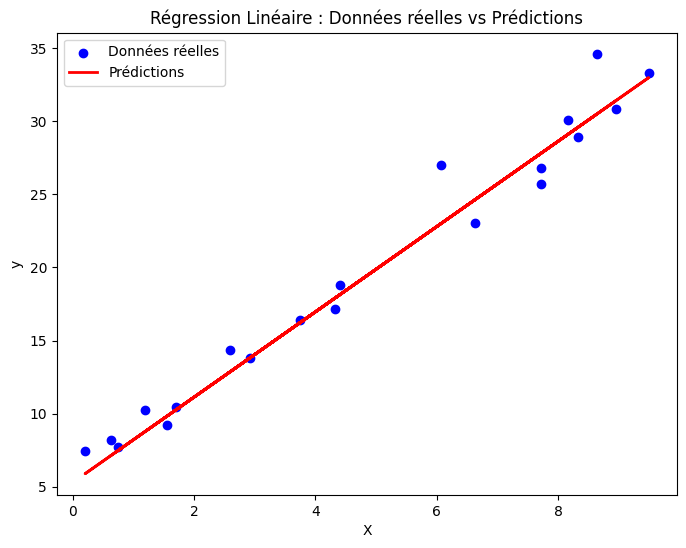

In [7]:
# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prédictions')
plt.title("Régression Linéaire : Données réelles vs Prédictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


### Classification

Ressources utiles: 

https://www.geeksforgeeks.org/getting-started-with-classification/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
np.random.seed(42)
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Création d'un DataFrame pour un aperçu
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y
data.head()


,Feature1,Feature2,Target
0,0.601034,1.535353,1
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,0.753178,0.787514,1


In [11]:
# Décomposition en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise en place de la classification logistique
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [12]:
# Prédiction sur le jeu de test
y_pred = model.predict(X_test)



* Métriques :
    
Accuracy : Proportion des prédictions correctes.

Precision : Pourcentage de vrais positifs parmi les prédictions positives.

Recall : Pourcentage de vrais positifs parmi les exemples positifs réels.

F1 Score : Moyenne harmonique entre précision et rappel.

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nÉvaluation du modèle :")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

# Rapport de classification et matrice de confusion
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))



Évaluation du modèle :
Accuracy : 0.90
Precision : 0.92
Recall : 0.86
F1 Score : 0.89

Rapport de classification :
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



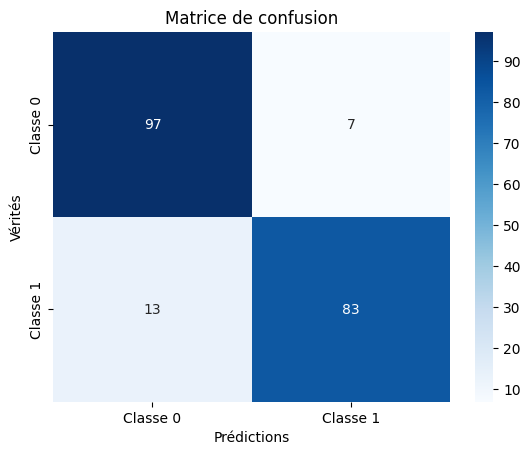

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de confusion')
plt.show()



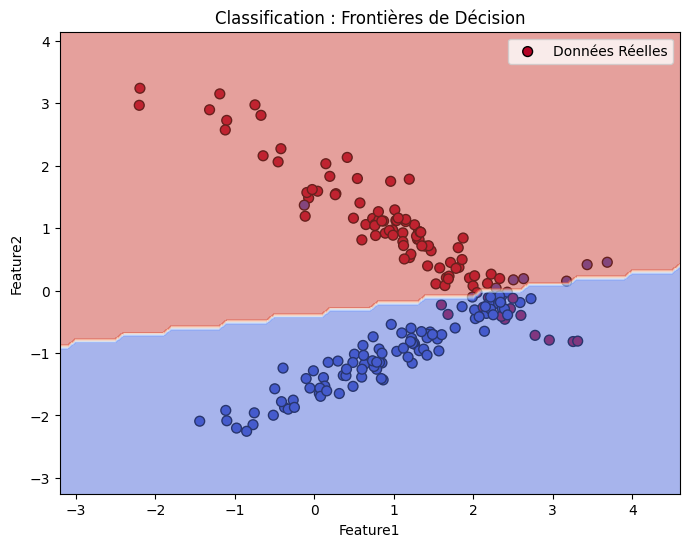

In [15]:
# Visualisation des données et des frontières de décision
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50, label="Données Réelles")
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.title('Classification : Frontières de Décision')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()


## Apprentissage Non Supervisé

### Clsutering: Kmeans

Ressources utiles :

https://www.statology.org/k-means-clustering-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
np.random.seed(42)
X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=1.0, random_state=42)

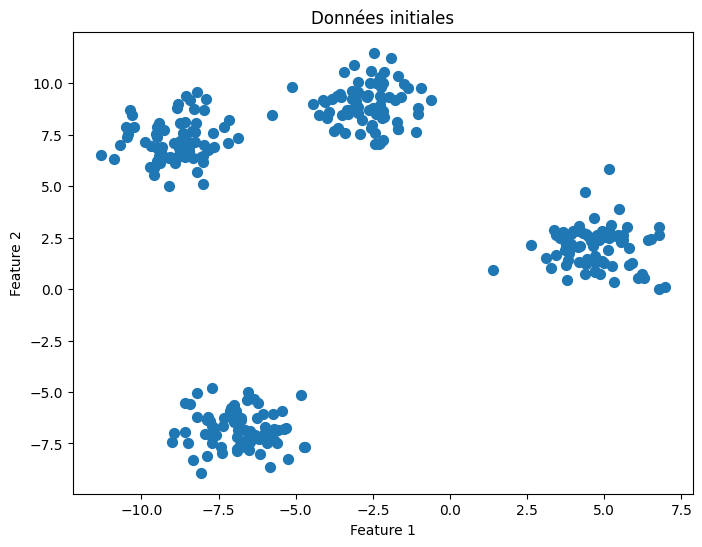

In [3]:
# Visualisation des données initiales
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Données initiales")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

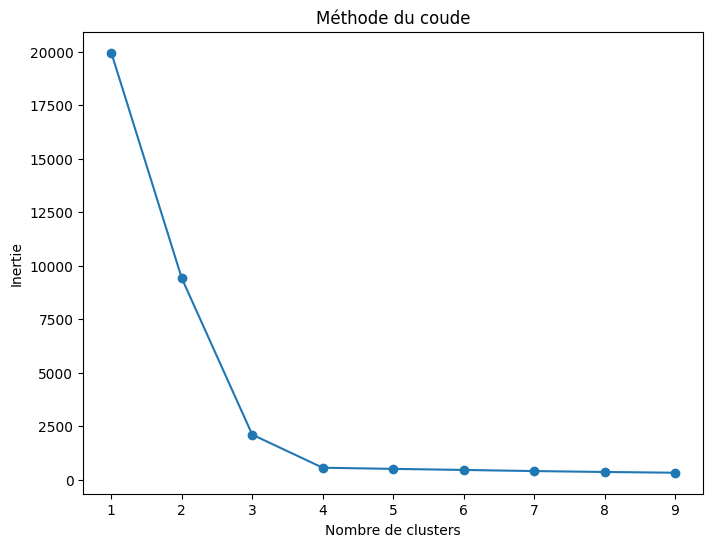

In [27]:
# Méthode du coude pour trouver le nombre optimal de clusters
#Calcul de l'inertie pour différents nombres de clusters (n_clusters).
inertia = []
range_clusters = range(1, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.xticks(range_clusters)
plt.show()

In [10]:
# Choisir le nombre de clusters (par exemple, 4 après avoir regardé le graphe)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)



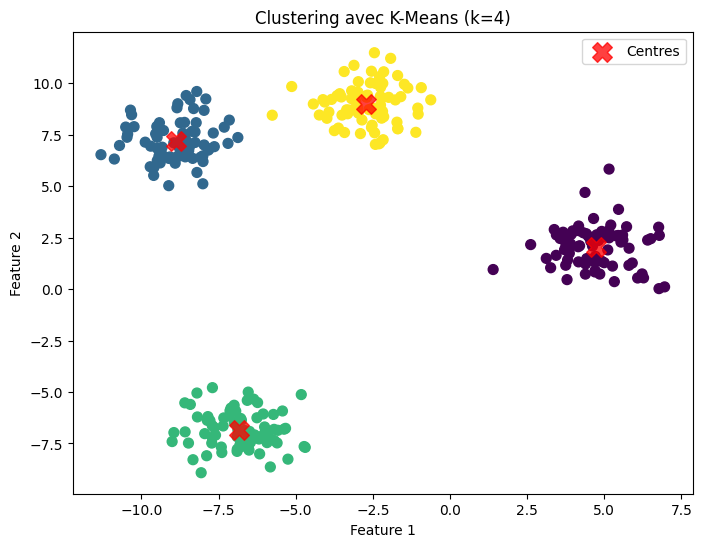

In [11]:
# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label="Centres")
plt.title(f"Clustering avec K-Means (k={n_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



Le score de silhouette est une métrique utilisée pour évaluer la qualité du clustering. Il mesure dans quelle mesure les points d’un cluster sont proches les uns des autres (compacité) et bien séparés des autres clusters (séparabilité). Il varie entre -1 et 1.

In [33]:
# Évaluation du clustering avec le score de silhouette
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Score de silhouette pour k={n_clusters}: {silhouette_avg:.2f}")


Score de silhouette pour k=4: 0.79
